![Fundo Linkedin_Ciência de Dados](https://github.com/user-attachments/assets/0aa9ee1f-9131-4f88-9f25-73b532d9b2f0)

# **Projeto para Concessão de Crédito desenvolvido em SQL e AWS**
## **Victor Resende**
_______________
# **Exploração e análise de dados de crédito com SQL**

Esse notebook é parte do curso SQL para análise de dados da EBAC.

**Curso**: Cientista de Dados

**GitHub**: https://github.com/VHResende/Projeto-04-Credito_SQL

**Resumo**: nesse projeto vamos explorar e analisar dados de banco para a concessão de crédito. Selecionamos uma parte dos dados que estão disponíveis em Dados originais - gitHub André Perez: https://github.com/andre-marcos-perez/ebac-course-utils. Nosso projeto é constituído de três partes: **1. Exploração de dados**; **2. Análise de Dados**; e **3. Conclusão**.
_____________

## **1. Exploração dos Dados**

### **Sobre os dados** 

Os dados representam informações de clientes de um banco e contam com as seguintes colunas: 

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade dos clientes
* estado_civil = estado civil dos clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m  = quantidade de transacoes dos ultimos 12 meses
______________
### **Base de Dados** 

* Lendo as 10 primeiras linhas do Dataset:

Query: SELECT * FROM credito LIMIT 10;

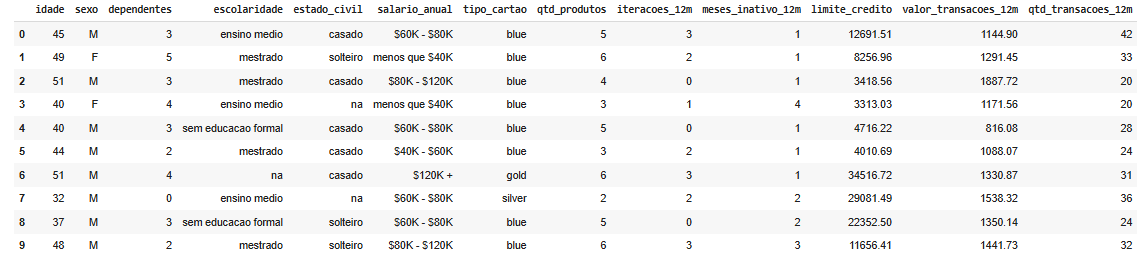

Observamos que existem valores faltantes que precisam ser tratados.
____________________
* Verificando a quantidade de informações em nosso Dataset:
 
Query: SELECT count(*) from credito;

Reposta: 2564 linhas.

**Obs.:** A base de dados original contém mais linhas do que a seleção utilizada.
_____________________
* Verificando os tipos de cada dado:

Query: DESCRIBE credito

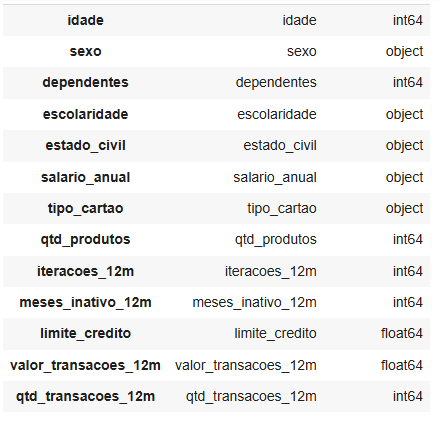
________________________
* Explorando os dados escolaridade:

Query: SELECT DISTINCT escolaridade FROM credito

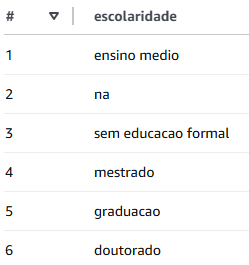

Aqui visualizamos os vários níveis de escolaridade em nosso Dataset.

Verificamos, também, que há valores nulos, que serão tratados posteriormente.
________________________
* Verificando os tipos de salários anuais no Dataset:

Query: SELECT count(*), salario_anual from credito group by salario_anual

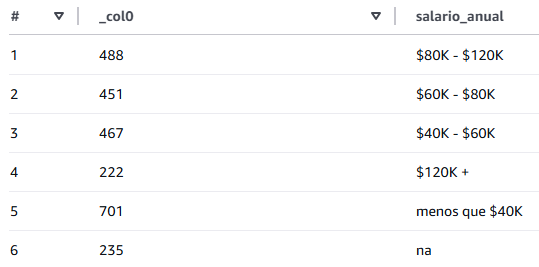

Aqui nós visualizamos as principais faixas salariais dos clientes.

Verificamos que também existem valores nulos.
________________________
* Quantidade de clientes agrupados por sexo:

Query: SELECT count(*), sexo from credito group by sexo

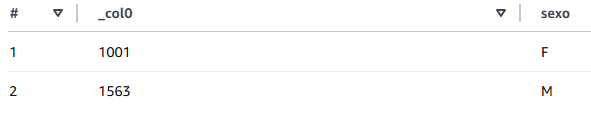

Aqui não há valores nulos.
____________
* Vefificando os tipos de cartão dos clientes:

Query: SELECT DISTINCT tipo_cartao FROM credito

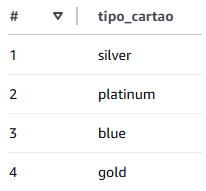

Aqui vemos que não há necessidade de tratar valores nulos.
___________

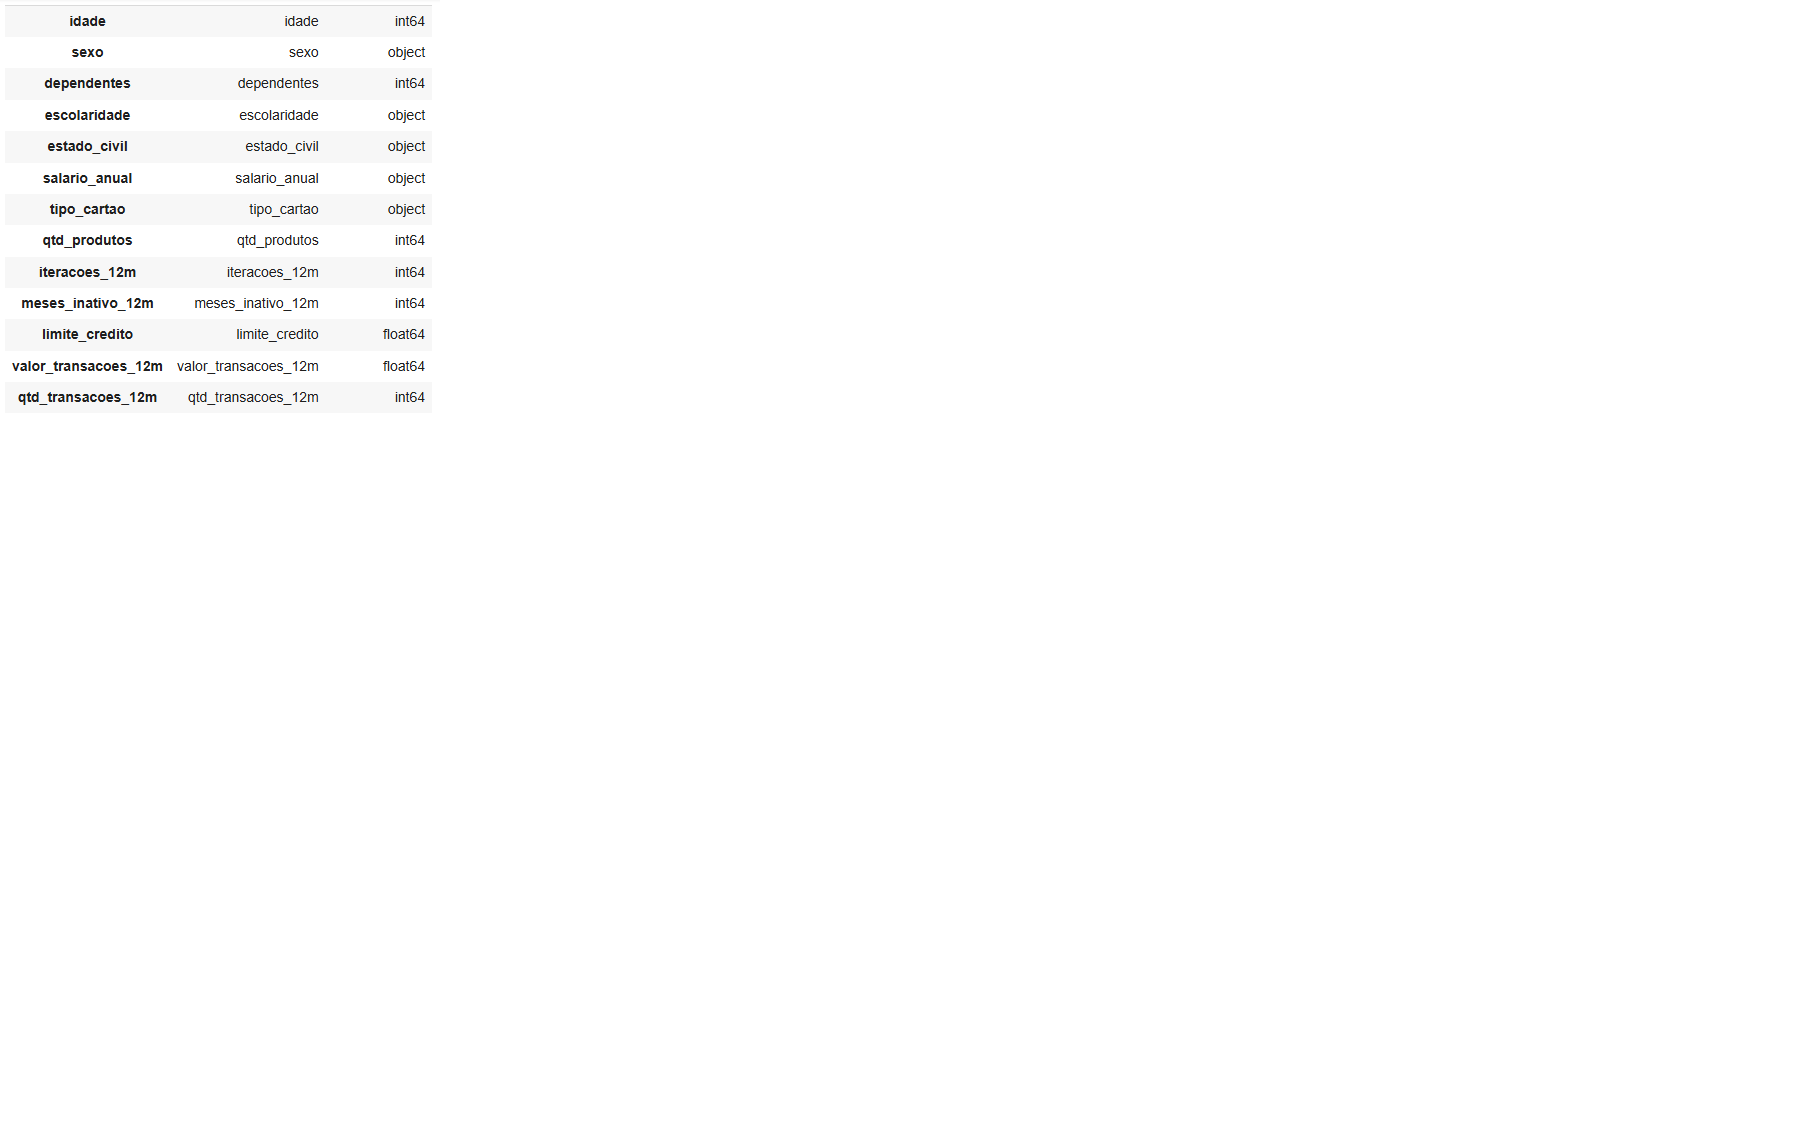
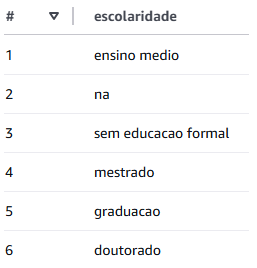
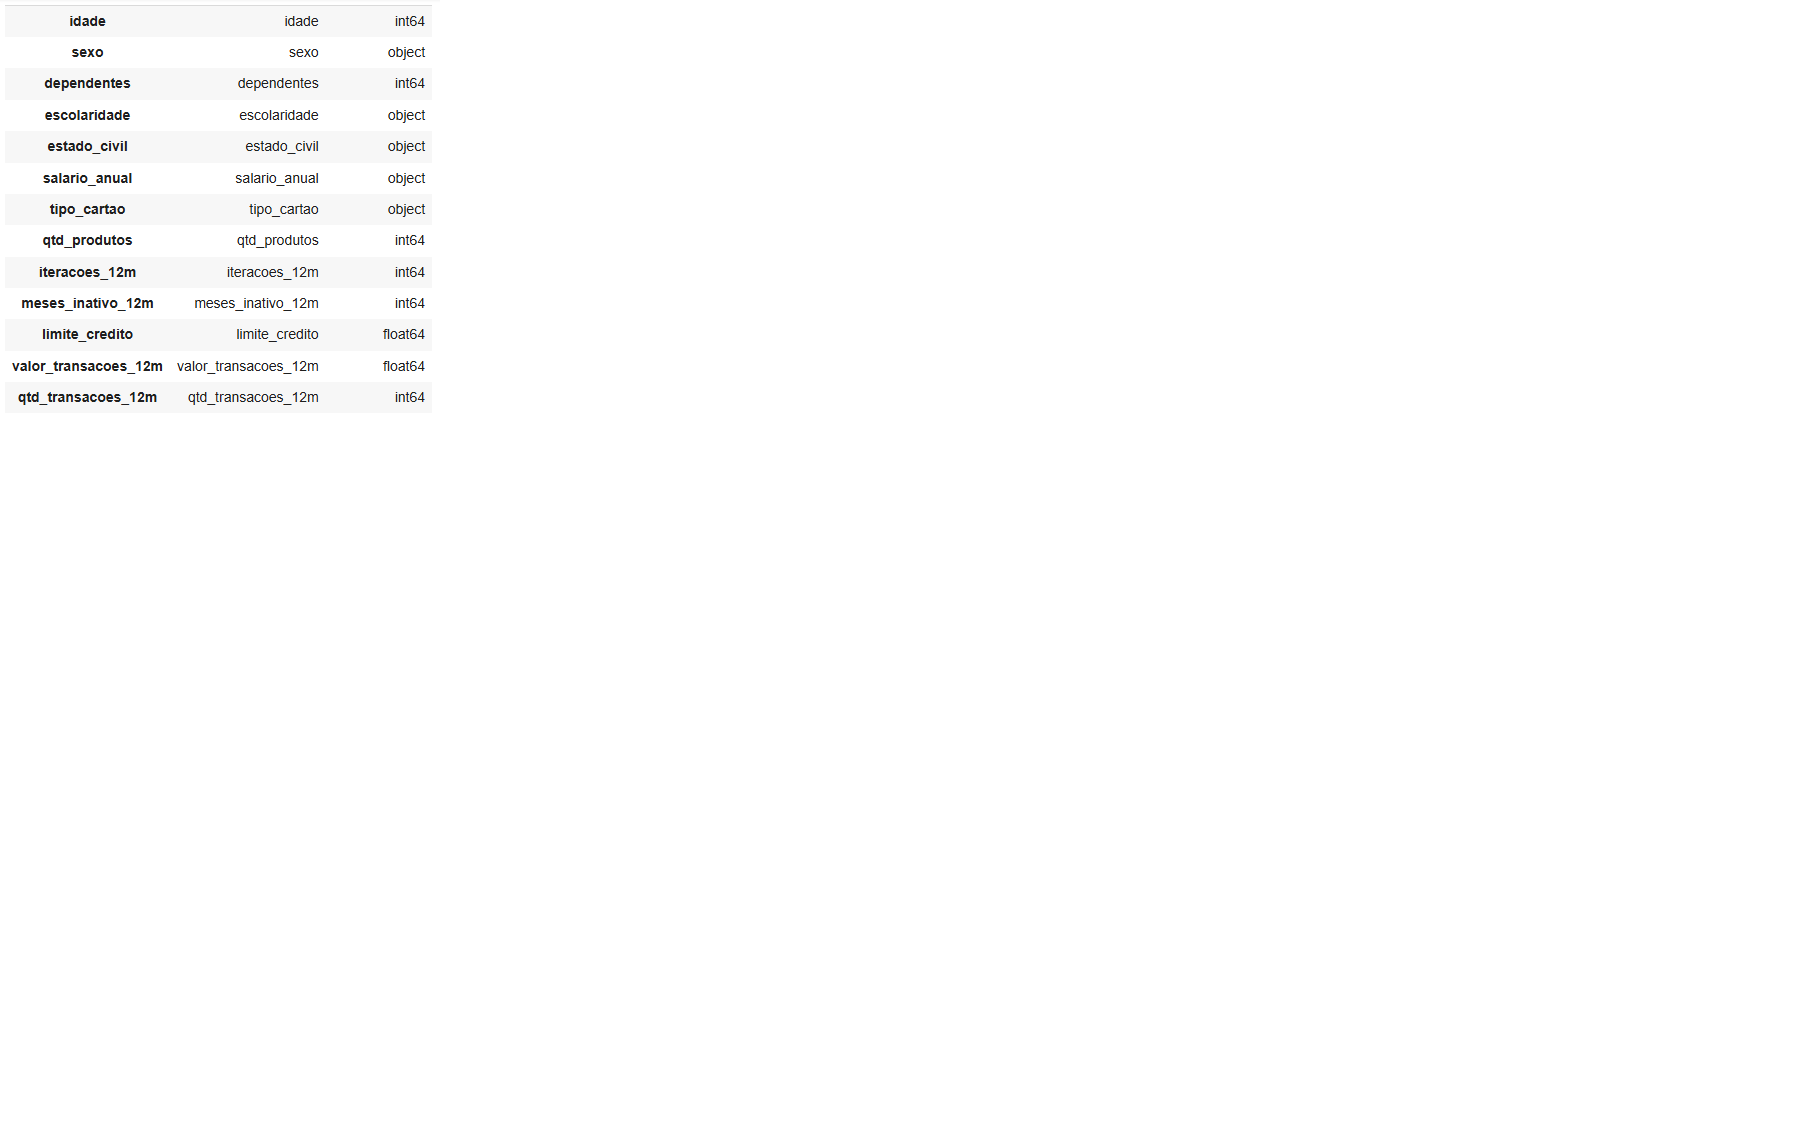
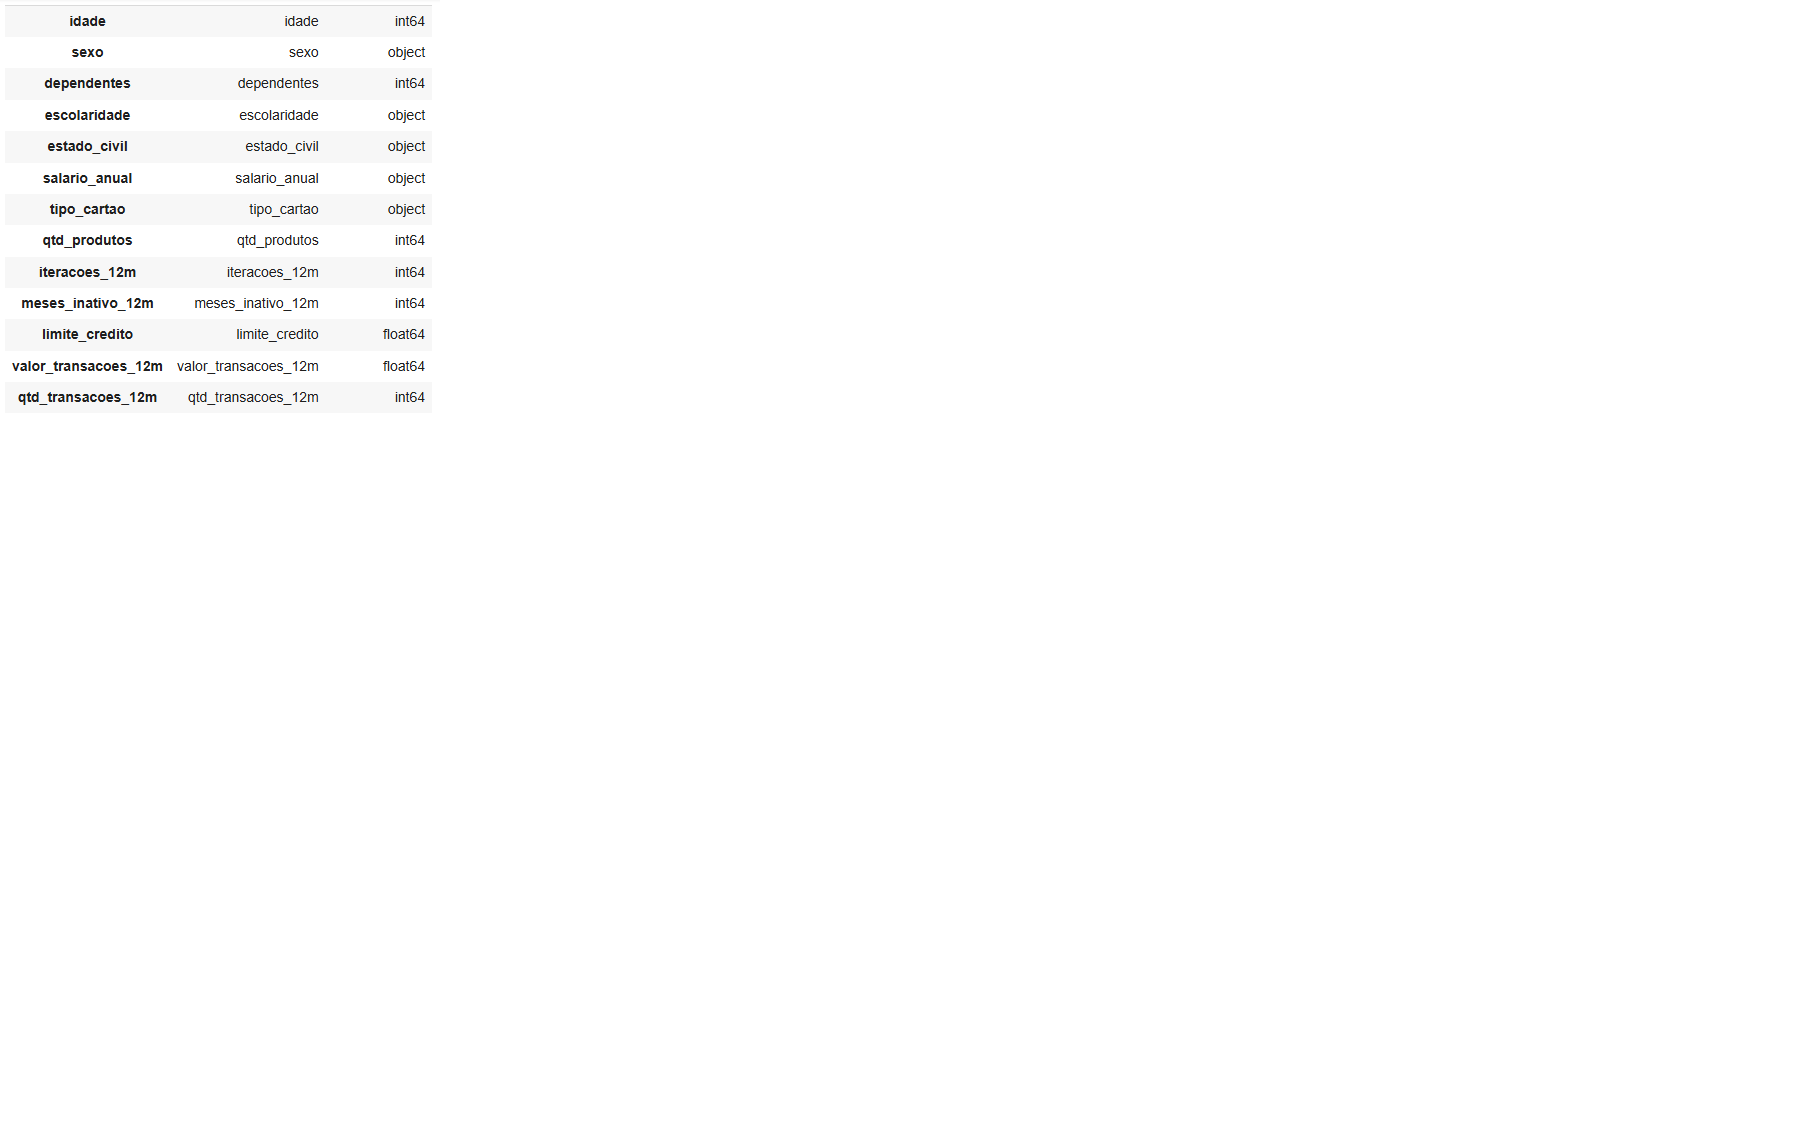
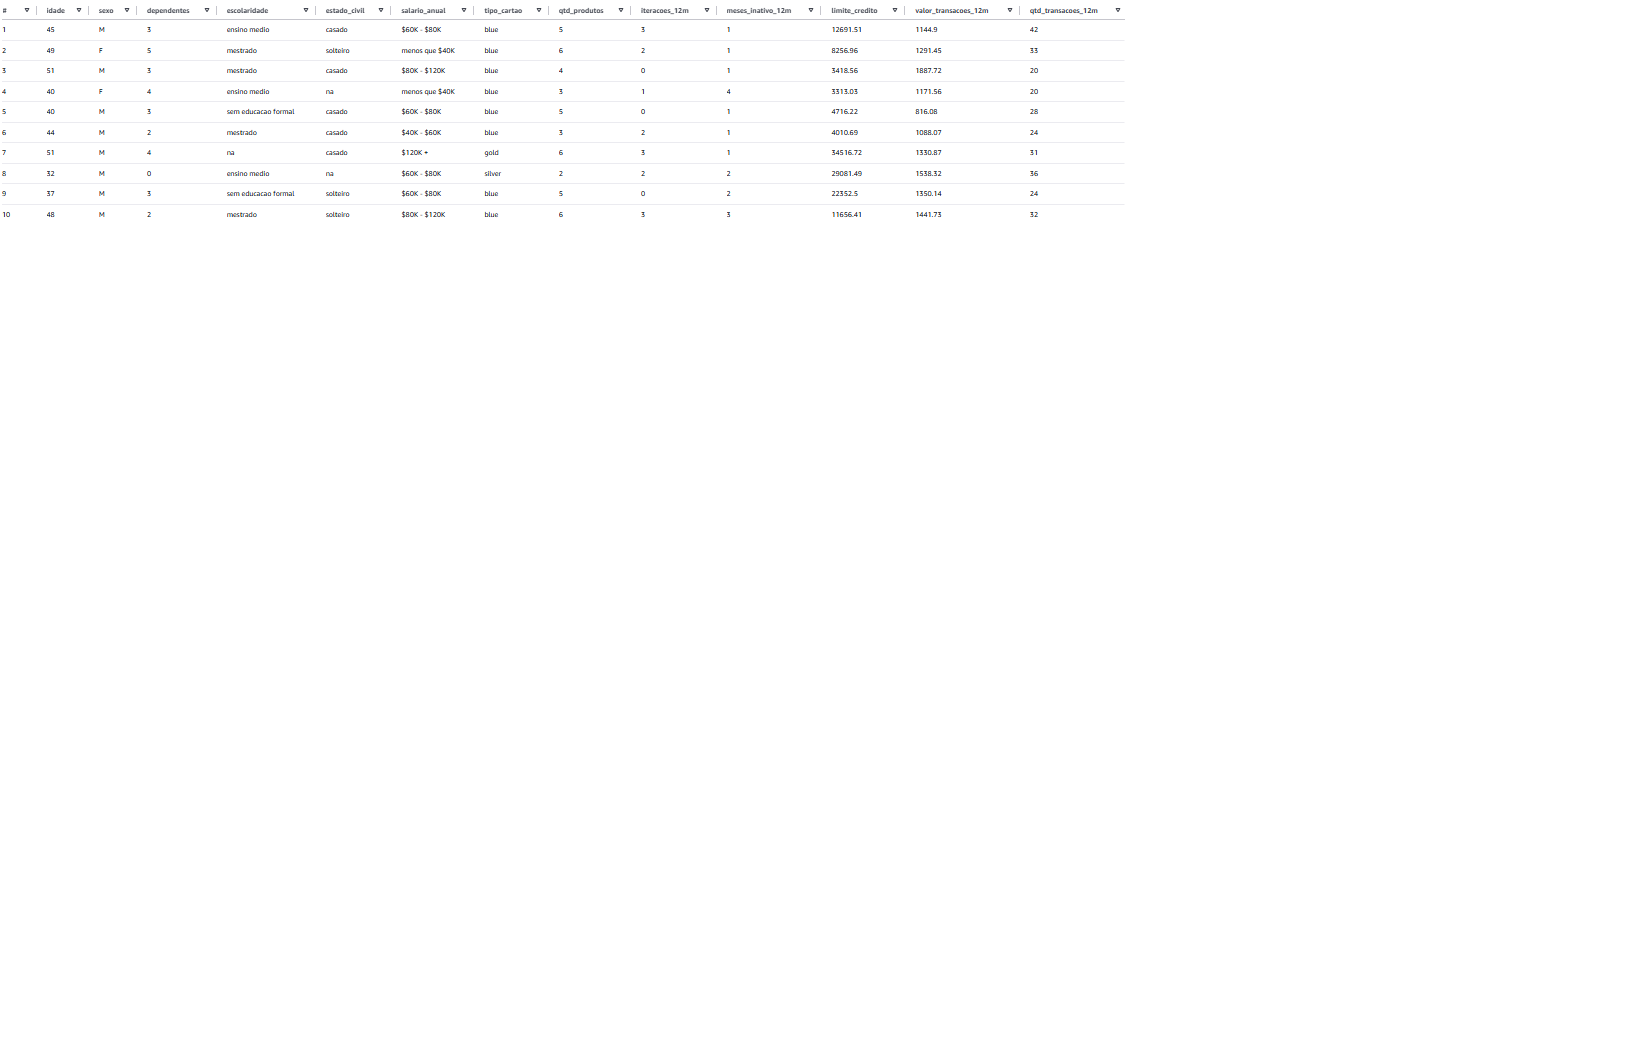

## **2. Análise dos Dados**

Após a fase de exploração, passamos para a etapa de entendimento dos nossos dados. 

Nessa etapa, buscamos entender quais são as informações que temos no nosso banco de dados e quais *insights* podemos extrair para as possibilidades de concessão de crédito para os clientes.

__________

* **Nesse banco de dados, quantos clientes temos de cada faixa salarial?**

Query: SELECT count(*) AS qtd_clientes, salario_anual salario_anual FROM credito GROUP BY salario_anual;

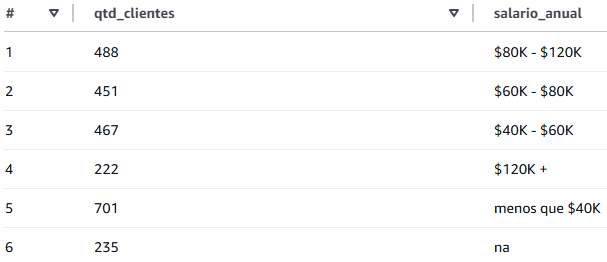

Percebemos que o maior número de clientes recebe menos de 40k.

____________

* **Qual a proporção de homens e de mulheres em nosso Dataset?**

Query: SELECT count(*) AS qtd_clientes, sexo FROM credito GROUP BY sexo

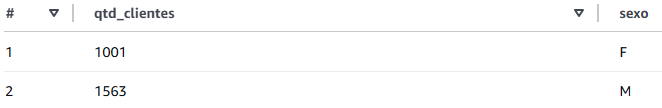

Percebemos que o número de clientes homens é maior que o de clientes mulheres.

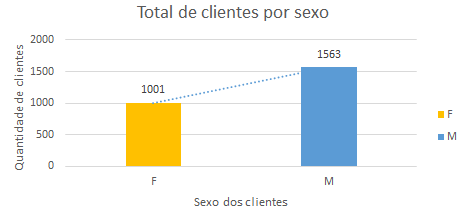

____________________

* **O nível de escolaridade impacta no limite de crédito dos clientes?**

Query: Select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito 
where escolaridade != 'na' and tipo_cartao != 'na' 
group by escolaridade, tipo_cartao, sexo 
order by limite_credito desc 
limit 10

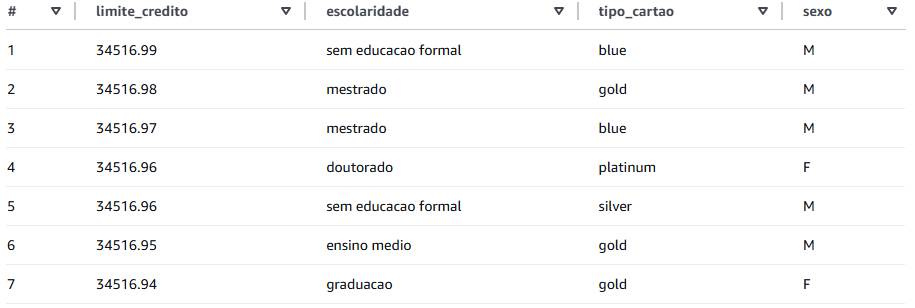

Podemos visualizar que o nível de escolaridade não impacta no limite de crédito dos clientes, visto que os clientes que têm maior limite de crédito não possuem educação formal.

Também nos chama a atenção que o tipo de cartão dos clientes com maior limite de crédito é blue, e não platinum como seria o esperado.

Verificamos, ainda, que os clientes do sexo masculino é que detêm maior limite de crédito.
_________
* **Qual público (masculino ou feminino) teve maior média de gasto com o cartão?**

Query: select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo 
from credito 
group by sexo

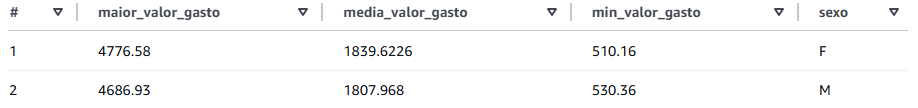

Notamos que, embora a proporção de homens seja maior, é o grupo das mulheres que mais gastou.

Mesmo que os valores sejam bem próximos, podemos dar mais atenção ao público feminino que pode ter um maior potencial de compra.

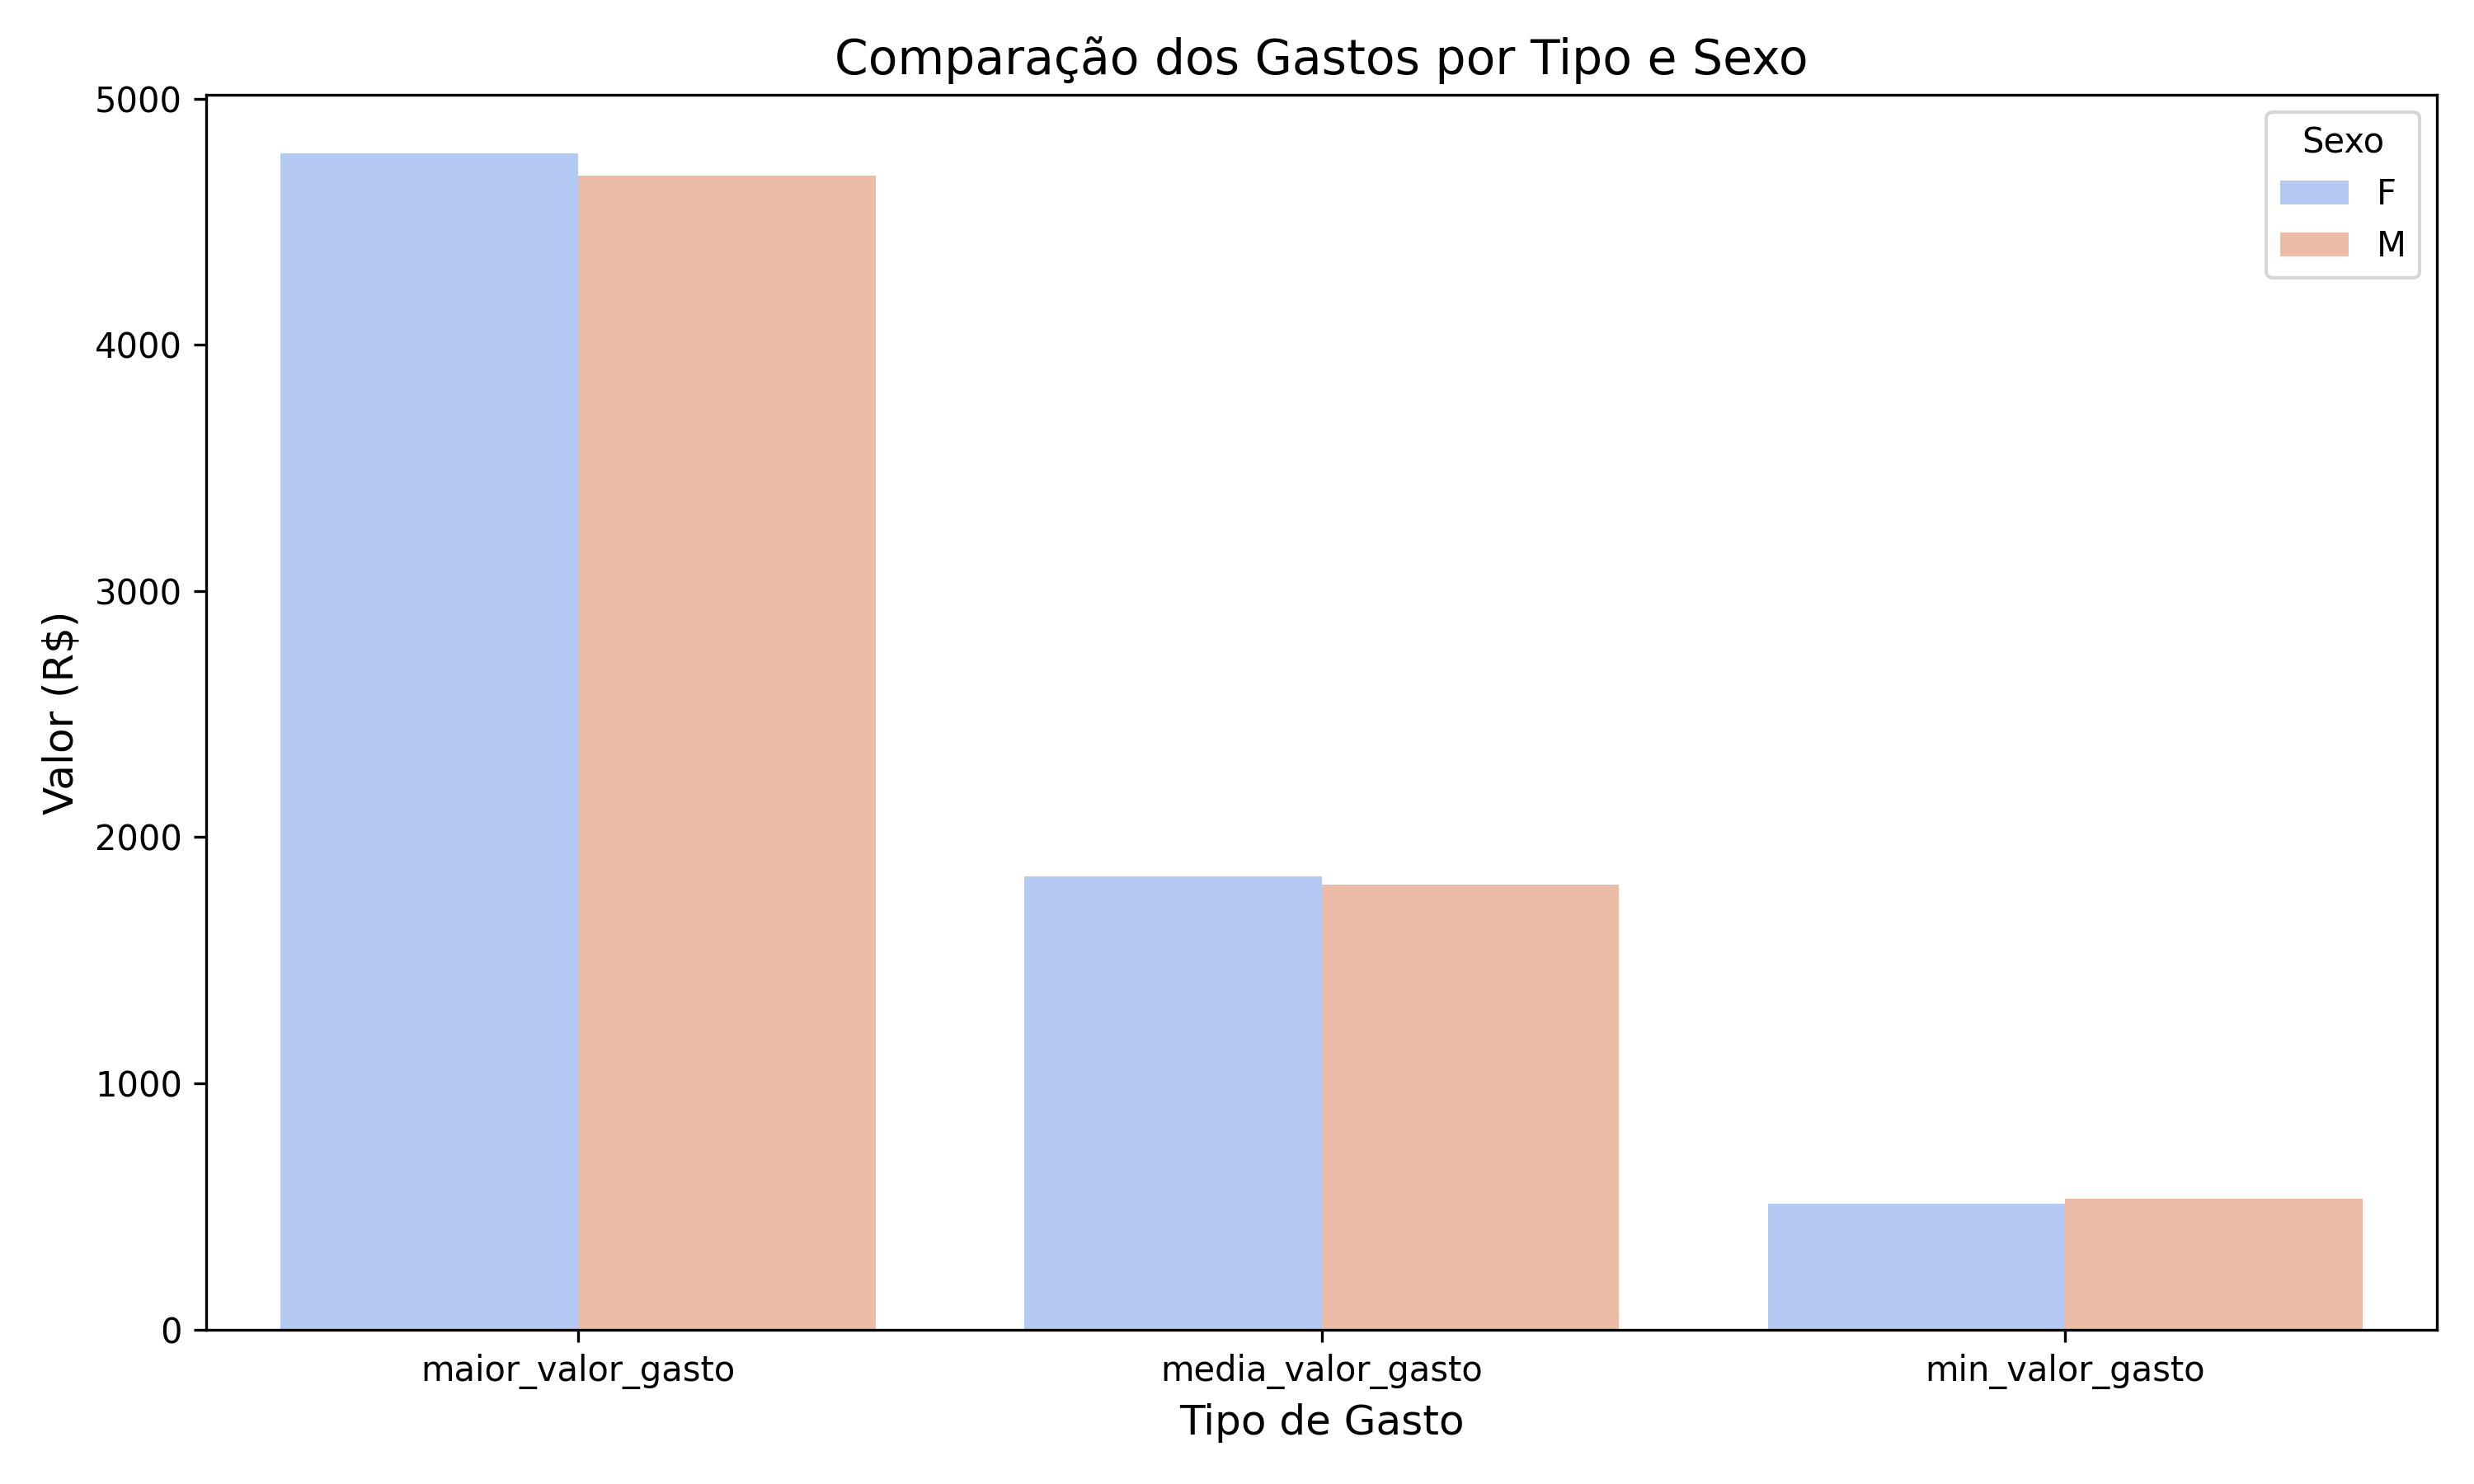
______

* **Qual a média de transações do público masculino e feminino, de acordo com a faixa salarial?**

Query: select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual 
from credito 
where salario_anual != 'na' 
group by sexo, salario_anual 
order by avg(valor_transacoes_12m) desc

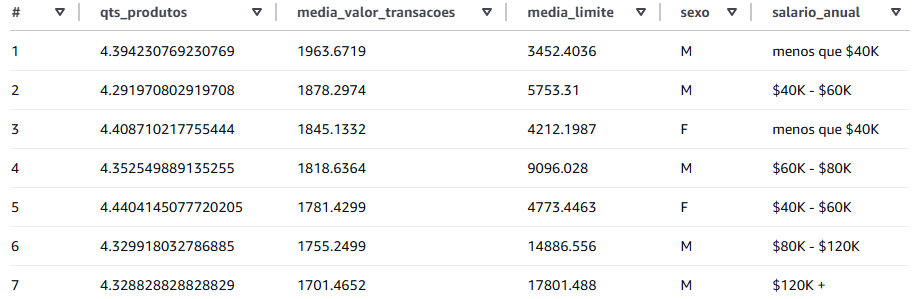

Aqui verificamos que as maiores transações são de homens, que ganham mais de 120k.

Com isso, verificamos que o salário impacta no limite de crédito.

Observamos, também, que as mulheres não estão nas maiores faixas salariais.

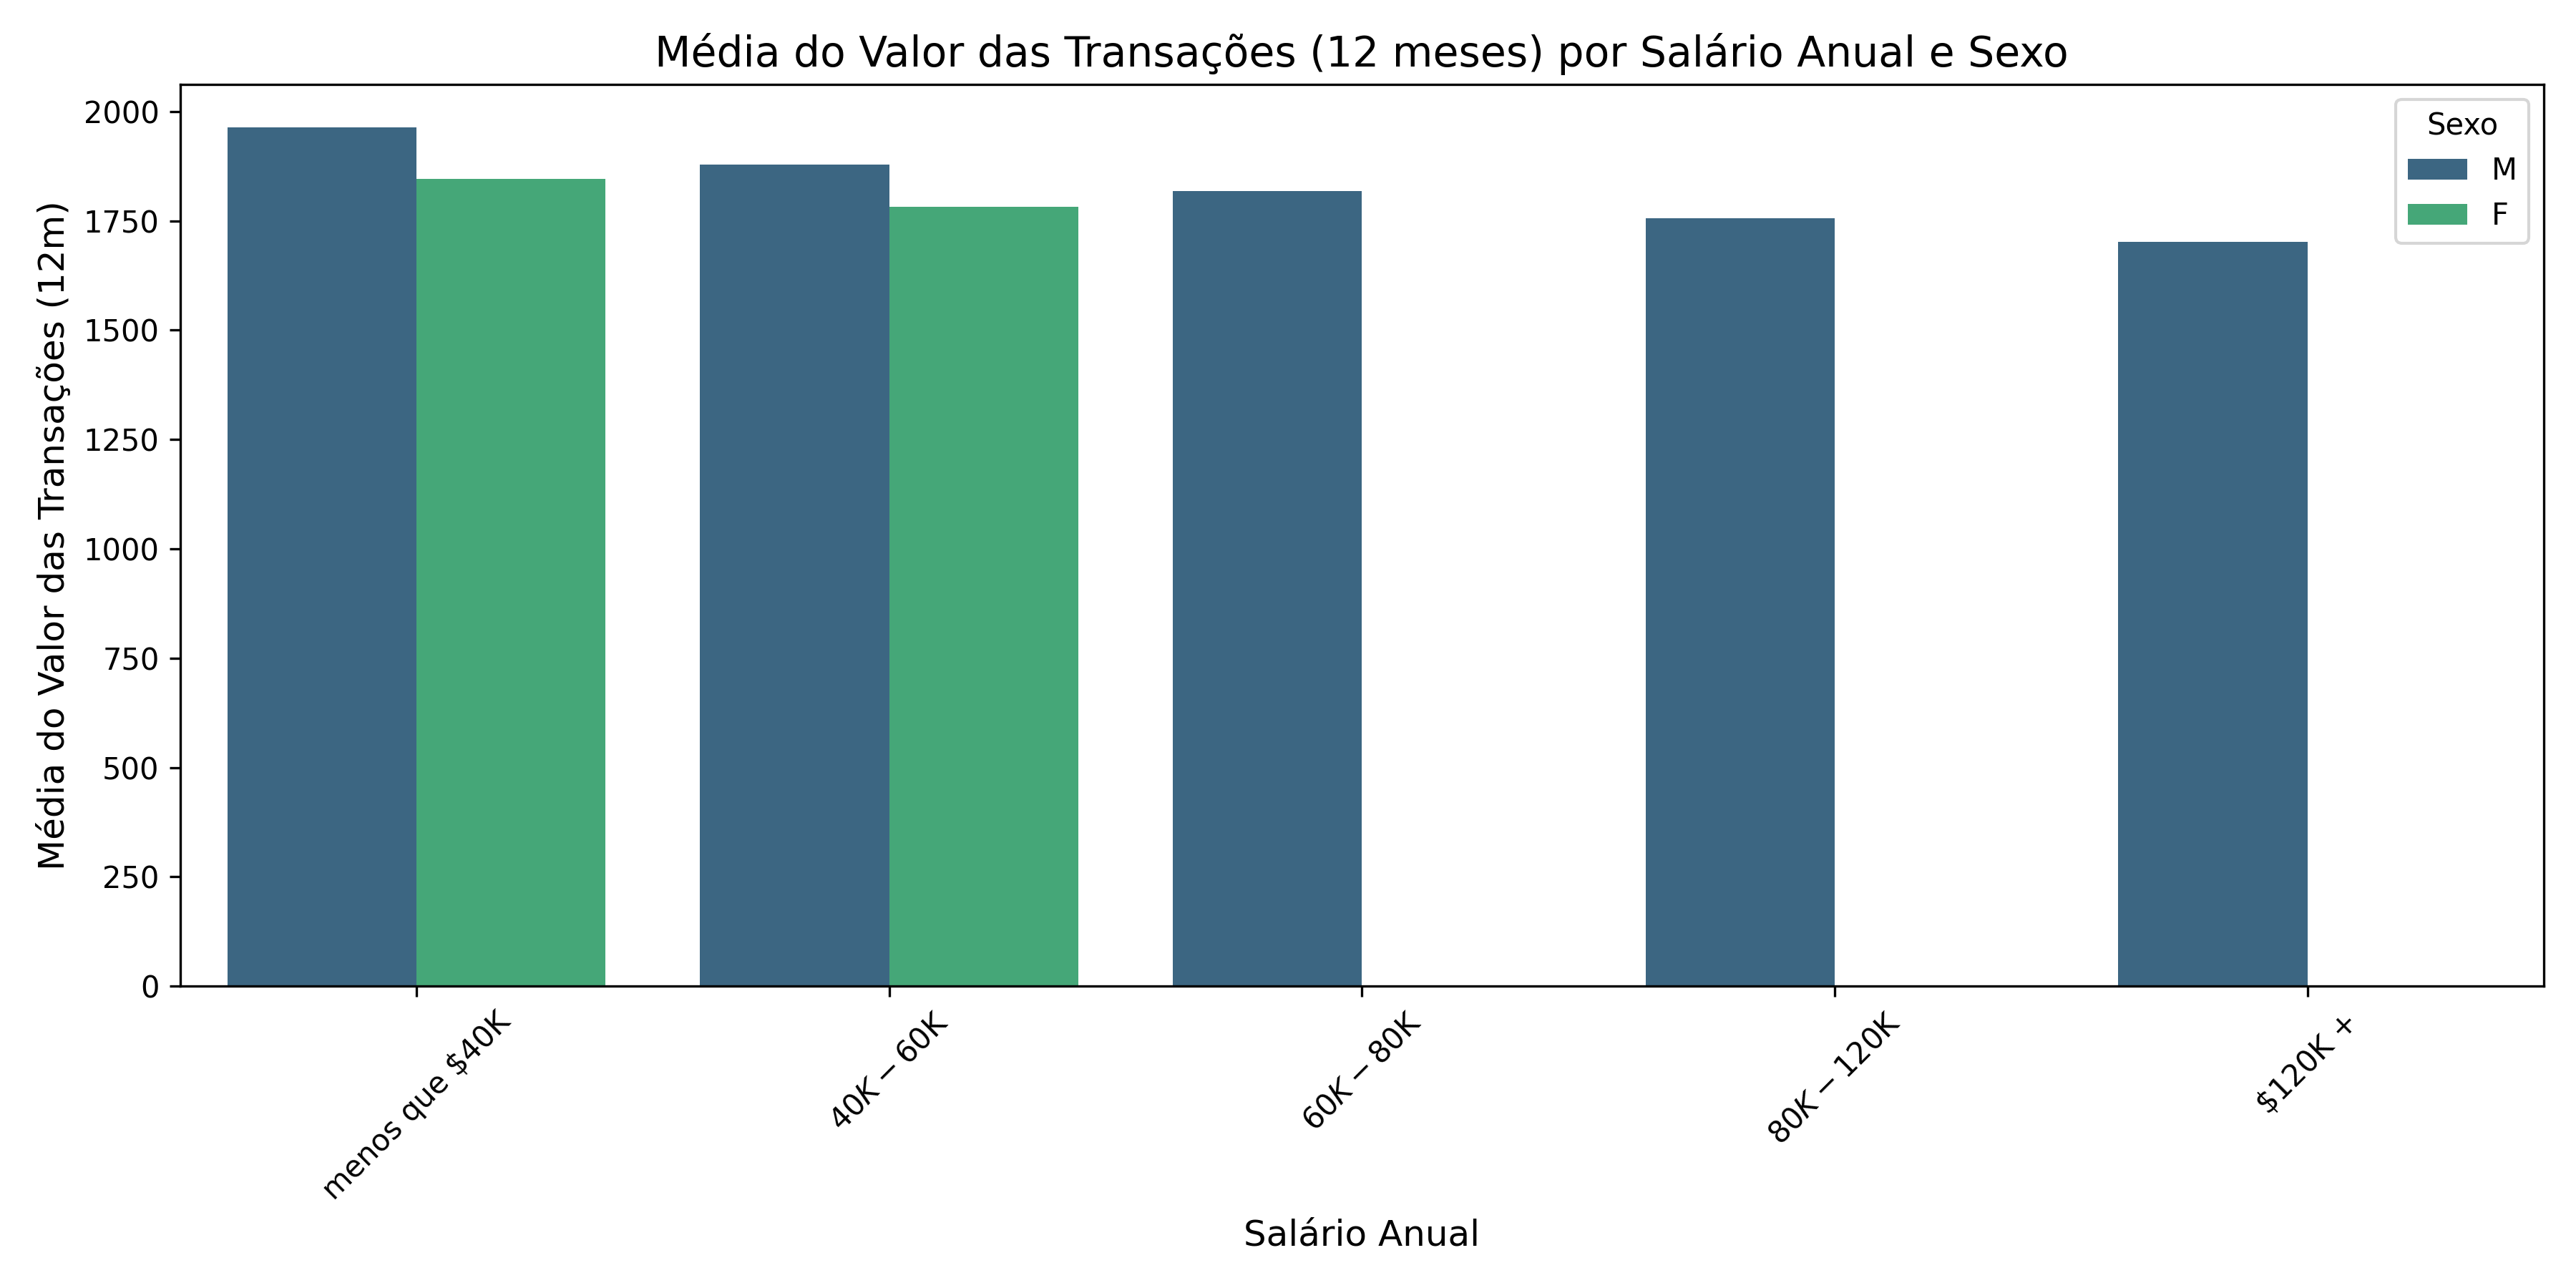
_______
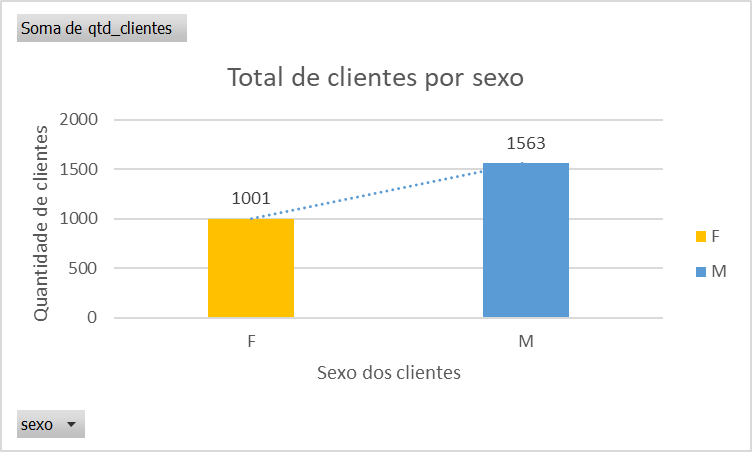
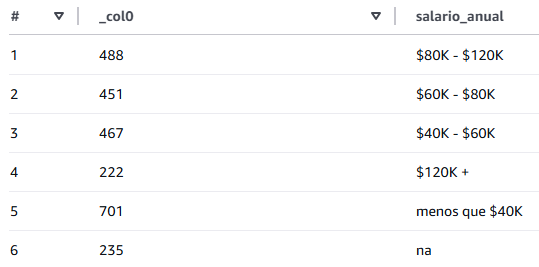
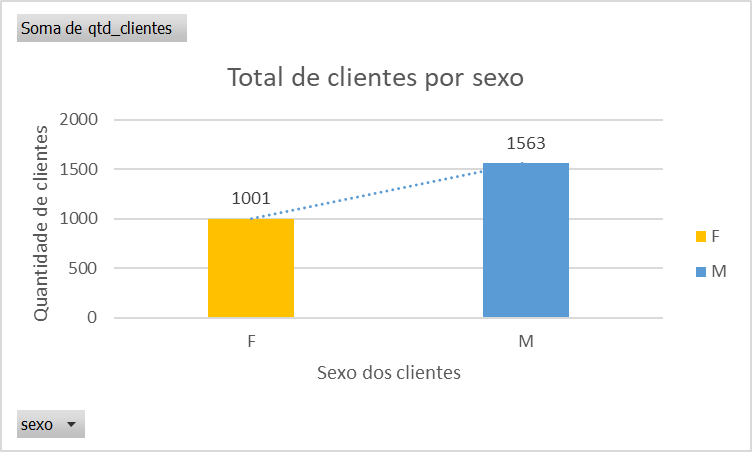
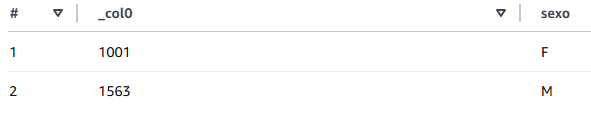

## **3. Conclusão**

Após a análise de nossos dados podemos extrair alguns *insights* interessantes:

- a maior parte dos clientes possui renda até 40K.
- **O que nos leva a pensar em estratégias para aumentar o crédito e outras opções interessantes para esses clientes**.
- o nível de escolaridade não impacta no limite de crédito dos clientes.
- a maior parte dos clientes é masculino.
- os clientes com maiores limites são em sua maioria homens.
- os clientes com menores limites são em sua maioria mulheres 
- não existem clientes com salário anual acima de 60K do sexo feminino.
- a faixa salarial impacta diretamente no limite de crédito.
- **Nesse caso, propomos novas ações de marketing para aumentar o número de clientes mulheres, visto ser um público muito mais propenso a compras, conforme percebemos em nossas análises**.
- **Podemos pensar em estudos culturais que expliquem os motivos da menor quantidade de mulheres que detêm maiores limites de crédito e propor ações que impactem na mudança desse comportamento no setor financeiro**.

